In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('movies.csv')

# (Graph) What was the runtime for each movie?

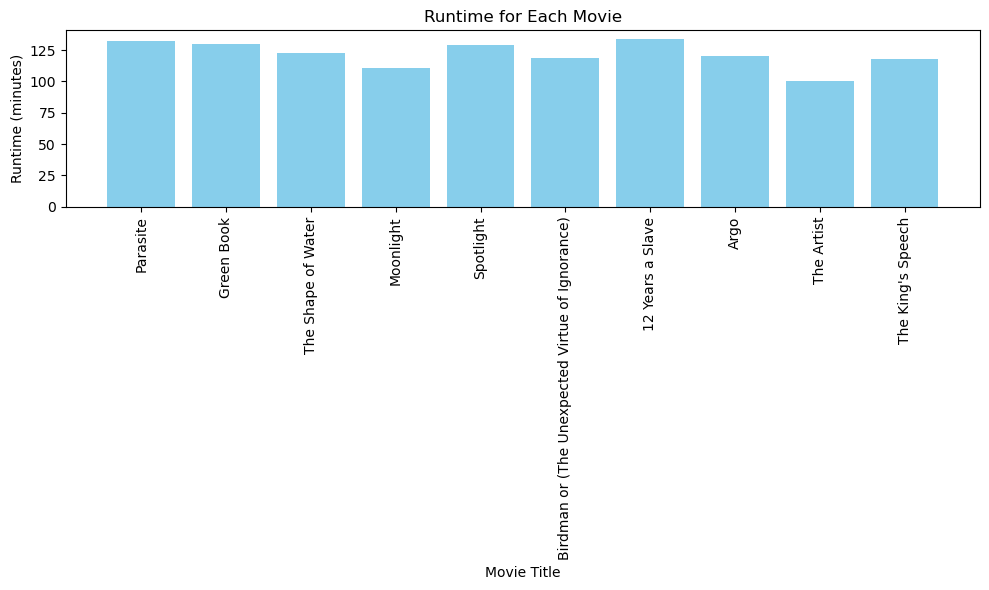

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(df['Movie Title'], df['Runtime'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.title('Runtime for Each Movie')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# What movie had the longest runtime?

In [5]:
max_index = df['Runtime'].idxmax()

longest_movie_title = df.loc[max_index, 'Movie Title']
longest_runtime = df.loc[max_index, 'Runtime']

print(f"The movie with the longest runtime is '{longest_movie_title}' with a runtime of {longest_runtime} minutes.")

The movie with the longest runtime is '12 Years a Slave' with a runtime of 134 minutes.


# Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

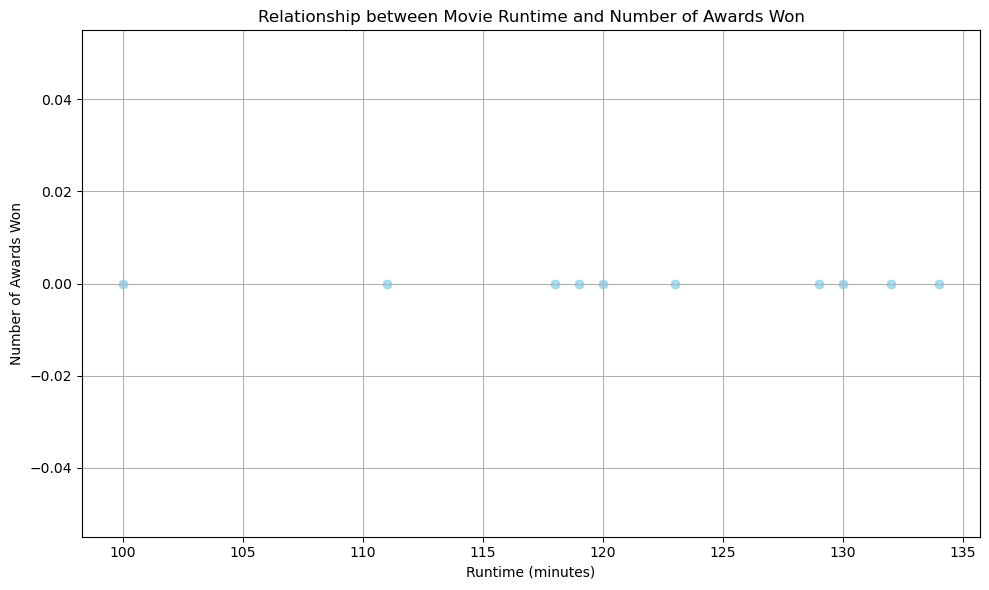

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['Award Wins'], color='skyblue', alpha=0.7)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Awards Won')
plt.title('Relationship between Movie Runtime and Number of Awards Won')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
correlation = df['Runtime'].corr(df['Award Wins'], method='pearson')
print(f"Correlation coefficient between movie runtime and number of awards won: {correlation}")

Correlation coefficient between movie runtime and number of awards won: nan


# (Graph) How many awards and nominations did each movie receive?

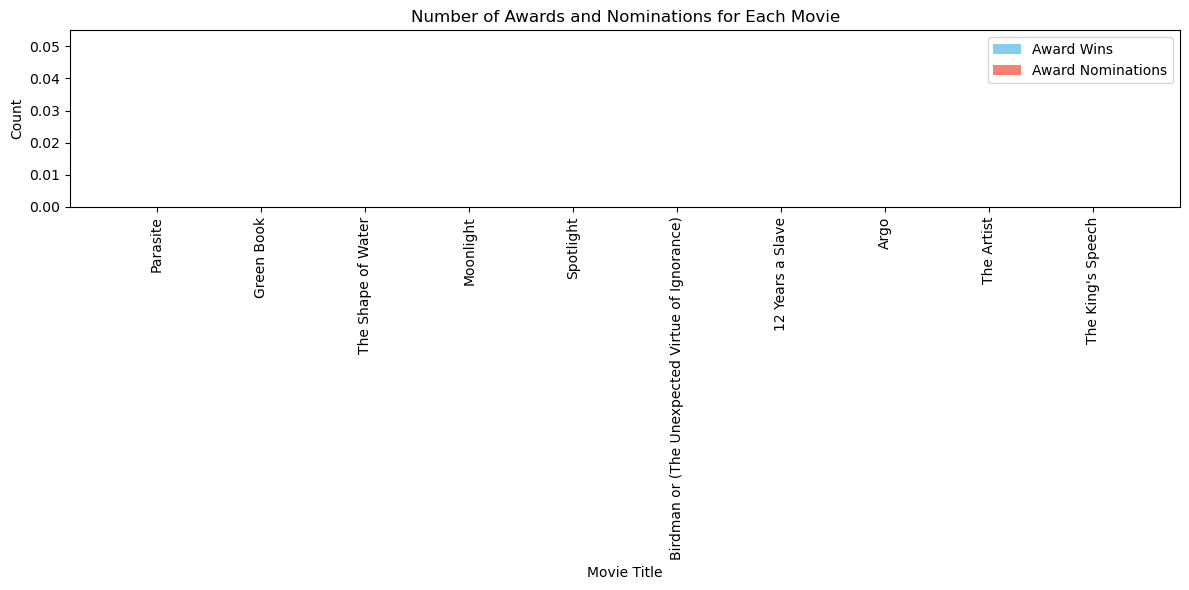

In [17]:
x = np.arange(len(df))

bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, df['Award Wins'], bar_width, color='skyblue', label='Award Wins')
plt.bar(x + bar_width/2, df['Award Nominations'], bar_width, color='salmon', label='Award Nominations')

plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Number of Awards and Nominations for Each Movie')
plt.xticks(x, df['Movie Title'], rotation=90)
plt.legend()
plt.ylim(0)
plt.tight_layout()
plt.show()